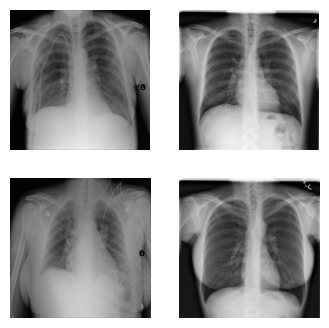

Found 3360 validated image filenames belonging to 2 classes.
Found 0 validated image filenames belonging to 2 classes.


In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image directories
normal_dir = "C:/National college/Foundation of artificial intelligent/project/project_code/TB_Chest_Radiography_Database/Normal"
tb_dir = "C:/National college/Foundation of artificial intelligent/project/project_code/TB_Chest_Radiography_Database/Tuberculosis"

# List image files in each directory
normal_images = os.listdir(normal_dir)
tb_images = os.listdir(tb_dir)

# Create a DataFrame with image paths and classes
data = pd.DataFrame({
    'image_path': [os.path.join(normal_dir, filename) for filename in normal_images] +
                  [os.path.join(tb_dir, filename) for filename in tb_images],
    'class': ["NORMAL"] * len(normal_images) + ["TUBERCULOSIS"] * len(tb_images)
})

# Display sample images
fig, axs = plt.subplots(2, 2, figsize=(4, 4))
for idx, ax in enumerate(axs.ravel()):
    img = cv2.imread(data.iloc[idx]['image_path'], cv2.IMREAD_GRAYSCALE)
    ax.imshow(img, cmap='gray')
    ax.axis('off')
plt.show()

# Define image data generators
batch_size = 32
image_size = (128, 128)

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2
)

# Create train generator
train_generator = train_datagen.flow_from_dataframe(
    data,
    x_col='image_path',
    y_col='class',
    target_size=image_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='binary',
    subset='training'
)

# Create validation generator
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
validation_generator = validation_datagen.flow_from_dataframe(
    data,
    x_col='image_path',
    y_col='class',
    target_size=image_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='binary',
    subset='validation'
)


In [7]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train the model
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
)

# Create an activation model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)



Epoch 1/5
105/105 [==============================] - 42s 388ms/step - loss: 0.4086 - accuracy: 0.8235
Epoch 2/5
105/105 [==============================] - 42s 400ms/step - loss: 0.2617 - accuracy: 0.8979
Epoch 3/5
105/105 [==============================] - 42s 401ms/step - loss: 0.2436 - accuracy: 0.9065
Epoch 4/5
105/105 [==============================] - 41s 387ms/step - loss: 0.2306 - accuracy: 0.9068
Epoch 5/5
105/105 [==============================] - 41s 389ms/step - loss: 0.2100 - accuracy: 0.9226


1/1 [==============================] - 0s 22ms/step


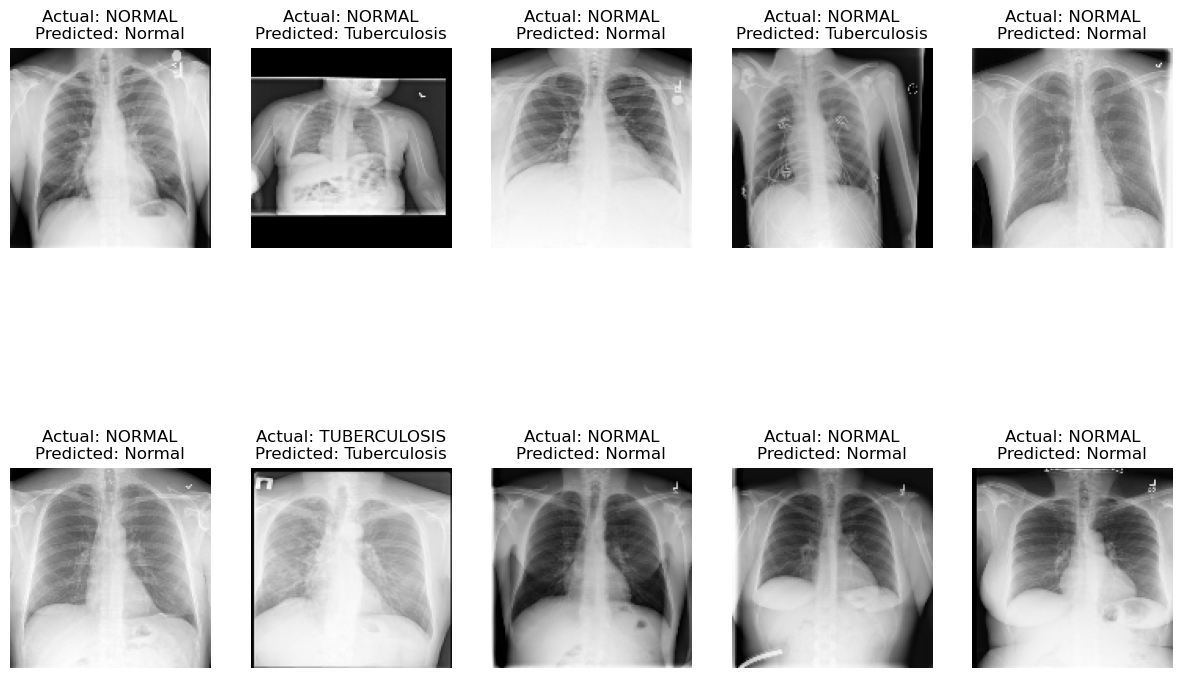

In [8]:
# Visualize random sample predictions

plt.figure(figsize=(15, 10))

for i in range(10):
    random_idx = random.randint(0, len(data) - 1)
    img_path = data['image_path'][random_idx]
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, image_size)
    img = np.expand_dims(img, axis=0)
    actual_class = data['class'][random_idx]
    predicted_class = "Tuberculosis" if model.predict(img) > 0.5 else "Normal"

    plt.subplot(2, 5, i + 1)
    plt.imshow(img[0], cmap='gray')
    plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}")
    plt.axis('off')

plt.show()

In [9]:
from tensorflow.keras.models import save_model
model.save("C:/National college/Foundation of artificial intelligent/project/project_code/TB_classification.h5")


C:\Users\Waqas\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("C:/National college/Foundation of artificial intelligent/project/project_code/TB_classification.h5")

# Now you can use the loaded model for predictions
img_path = "C:/National college/Foundation of artificial intelligent/project/project_code/TB_Chest_Radiography_Database/testing_T/Normal-581.png"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, image_size)
img = np.expand_dims(img, axis=0)

# Make predictions using the loaded model
prediction = loaded_model.predict(img)

# If your model is binary classification, you can check the result like this:
if prediction > 0.5:
    print("Tuberculosis")
else:
    print("Normal")

1/1 [==============================] - 0s 69ms/step
Normal
